### Dataset & Dataloader
- `torch.utils.data.DataLoader`, `torch.utils.data.Dataset`
- `Dataset`: 샘플과 정답(label)을 저장
- `DataLoader`: `Dataset`을 샘플에 쉽게 접근할 수 있도록 순회 가능한 객체(iterable)로 감싸줌

#### Loading a Dataset
- *TorchVision* 에서 [Fashion-MNIST](https://github.com/zalandoresearch/) dataset을 불러오는 예제
- Fashin_MNIST: 60,000개의 train example과 10,000의 test example
- 각 예제는 grayscale의 28x28 이미지와 10개 분류(class)중 하나인 정답(label)으로 구성
- parameters:
    - `root` : 학습/테스트 데이터가 저장되는 경로
    - `train` : 학습용 또는 테스트용 데이터셋 여부 지정
    - `download=True` : `root`에 데이터가 없는 경우 인터넷에서 다운로드
    - `transform`, `target_transform` : 특징(feature)과 정답(label) 변형(transform)을 지정

In [1]:
import torch
from torch.utils.data import Dataset        
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor()
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()

)

100.0%
100.0%
100.0%
100.0%


#### 데이터셋을 순회하고 시각화하기
- `Dataset`에 리스트(list)처럼 직접 접근(index) 가능
- `training_data[index]`, `matplotlib`을 사용하여 학습 데이터의 일부를 시각화

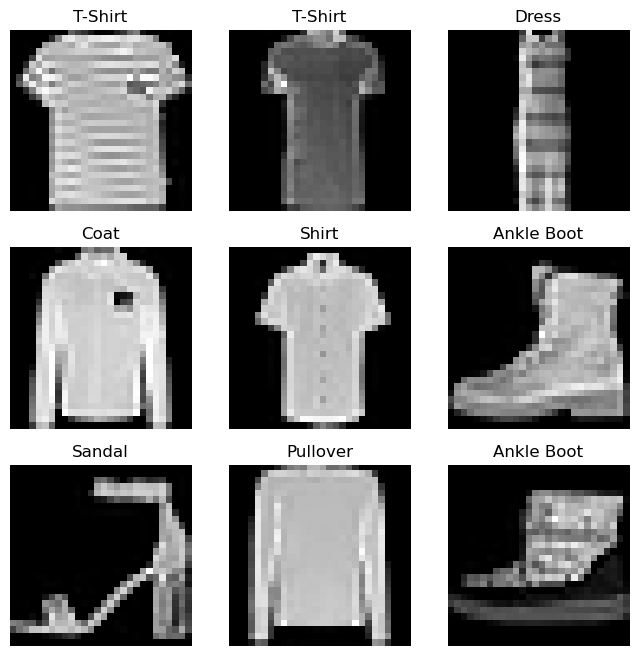

In [2]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

#### 파일에서 사용자 정의 데이터셋 만들기
- 반드시 3개 함수 구현
    - `__init__`, `__len__`, `__getitem__`

In [3]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_trasnform=None):       # 데이터 로딩 방식 정의
        self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):                                                                          # 데이터의 개수
        return len(self.img_labels)   # 전체 sample의 개수

    def __getitem__(self, idx):                                                                 # 데이터셋에서 인덱스를 이용해 하나의 샘플을 꺼낼 때 어떻게 꺼낼지 정의하는 함수                                                           # idx 번째 데이터 꺼내는 방법
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

#### DataLoader로 학습용 데이터 준비하기
- `Dataset` : 데이터셋의 feature을 가져오고 하나의 샘플에 label을 지정하는 일
- 모델을 학습할 때, 일반적으로 샘플들을 minibatch로 전달하고, 매 epoch마다 데이터를 다시 섞어 overfitting을 막고, Python의 multiprocessing을 사용하여 데이터 검색 속도를 높임

In [4]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

#### DataLoader를 통해 순회하기 (iterate)
- DataLoader에 데이터셋을 불러온 뒤에는 필요에 따라 데이터셋을 순회(iterate)할 수 있음

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


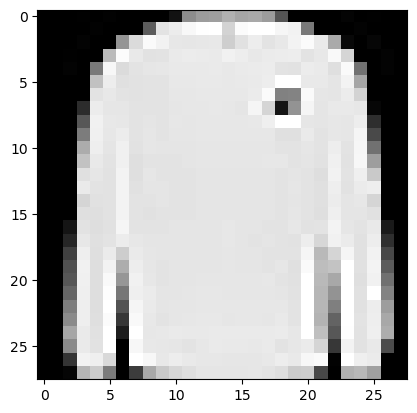

Label: 2


In [5]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")